This script is for visualising input feature importance of the post-processing models. Figure 4.2 in the report is produced by this script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pickle
import time

/Users/clifflau/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Change paths for own use
ROOT = "ROOT/"
data_path = ROOT+"Data Preprocessings/"
model_path = ROOT+"trained_models/lead_time_continuous/"

In [3]:
df_test = pd.read_csv(data_path + "df_test.csv", dtype={'time_in_day':'category', 'season':'category'})

In [5]:
features = ['lead_hr', 'station_alt', 'dis_from_coast', 'time_in_day', 'day_in_year_sin', 'day_in_year_cos',
                    't_ensemble_mean', 't_ensemble_std',
                    'q_ensemble_mean', 'q_ensemble_std',
                    'tp6_ensemble_mean', 'tp6_ensemble_std',
                    'tcc_ensemble_mean', 'tcc_ensemble_std',
                    'wind_ensemble_mean', 'wind_ensemble_std',
                    'vis_ensemble_mean', 'vis_ensemble_std']

x_test = df_test[features]
y_test = df_test['vis_obs']

x_test = x_test.join(pd.get_dummies(x_test['time_in_day']))
x_test = x_test.drop('time_in_day',axis=1)

x_test.columns

Index(['lead_hr', 'station_alt', 'dis_from_coast', 'day_in_year_sin',
       'day_in_year_cos', 't_ensemble_mean', 't_ensemble_std',
       'q_ensemble_mean', 'q_ensemble_std', 'tp6_ensemble_mean',
       'tp6_ensemble_std', 'tcc_ensemble_mean', 'tcc_ensemble_std',
       'wind_ensemble_mean', 'wind_ensemble_std', 'vis_ensemble_mean',
       'vis_ensemble_std', '06', '12', '18', '00'],
      dtype='object')

In [6]:
# Open your designated model
with open(model_path + 'giant_300_20.pkl', 'rb') as f:
    rf = pickle.load(f)

In [7]:
features_list = list(x_test.columns)
features_list[17]='Forecast Time: 0600'
features_list[18]='Forecast Time: 1200'
features_list[19]='Forecast Time: 1800'
features_list[20]='Forecast Time: 0000'

In [20]:
features_list[3] = 'day_of_year_sin'
features_list[4] = 'day_of_year_cos'
features_list

['lead_hr',
 'station_alt',
 'dis_from_coast',
 'day_of_year_sin',
 'day_of_year_cos',
 't_ensemble_mean',
 't_ensemble_std',
 'q_ensemble_mean',
 'q_ensemble_std',
 'tp6_ensemble_mean',
 'tp6_ensemble_std',
 'tcc_ensemble_mean',
 'tcc_ensemble_std',
 'wind_ensemble_mean',
 'wind_ensemble_std',
 'vis_ensemble_mean',
 'vis_ensemble_std',
 'Forecast Time: 0600',
 'Forecast Time: 1200',
 'Forecast Time: 1800',
 'Forecast Time: 0000']

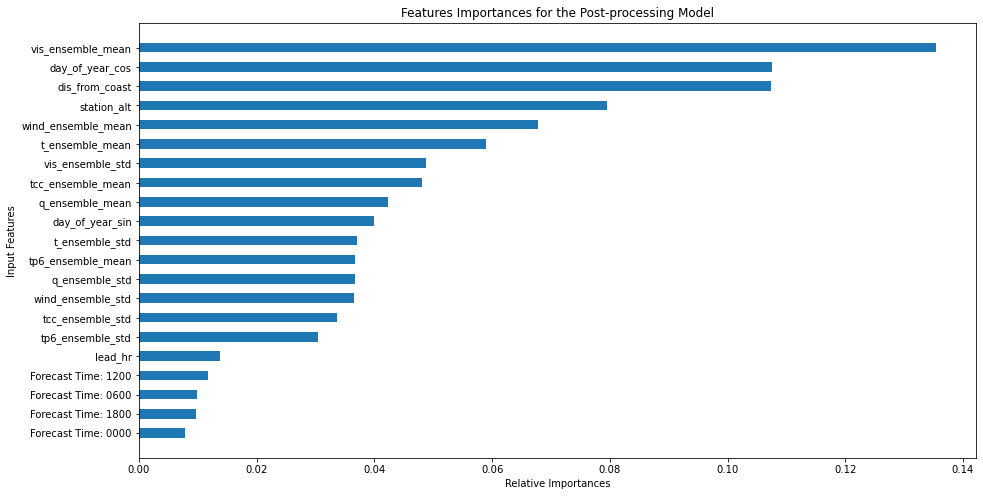

In [21]:
# Feature importance
plt.figure(figsize=(15,8))
importances = rf.feature_importances_
indices = np.argsort(importances)
features_sorted = []
for i in range(len(features_list)):
    features_sorted.append(features_list[indices[i]])
plt.barh(np.arange(len(features_sorted)), importances[indices], height=0.5)
plt.yticks(np.arange(len(features_sorted)), features_sorted)
plt.ylabel("Input Features")
plt.xlabel("Relative Importances")
plt.title("Features Importances for the Post-processing Model")